In [1]:
import tequila as tq
import qiskit

geom = "H 0.0 0.0 0.0\nH 0.0 0.0 0.7"
mol = tq.chemistry.Molecule( geometry=geom, basis_set="sto-3g", transformation="jordan_wigner")

# single excitation unitary
idx = [(0), (1)]
excitation_gate = mol.make_excitation_gate(idx, angle="s")
tq.draw(excitation_gate)

0: ───X^0.5────@─────────────────────────────────────@───X^-0.5───Y^-0.5───@─────────────────────────────────────@───Y^0.5────
               │                                     │                     │                                     │
1: ───Y^-0.5───X───Z^(0.318309886183791*f((s,))_0)───X───Y^0.5────X^0.5────X───Z^(0.318309886183791*f((s,))_1)───X───X^-0.5───


''

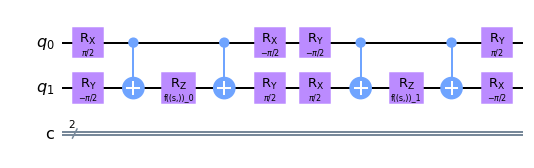

In [2]:
# double excitation unitary
idx = [(0), (1)]
excitation_gate = mol.make_excitation_gate(idx, angle="s")

qiskit_circuit = tq.compile(excitation_gate, backend='qiskit').circuit
qiskit_circuit.draw(output='mpl')

In [3]:
import numpy as np
variables = {"s" : np.pi**2}
wfn = tq.simulate(excitation_gate, variables=variables, samples=10, backend='qiskit')
wfn

+10.0000|00> 

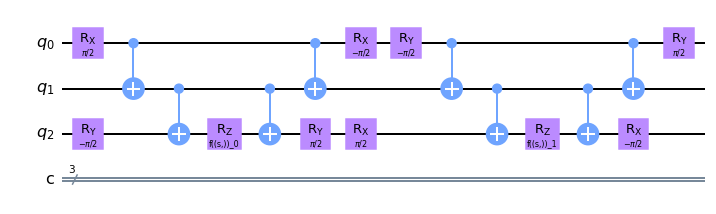

In [4]:
# double excitation unitary
idx = [(1), (3)]
excitation_gate = mol.make_excitation_gate(idx, angle="s")

qiskit_circuit = tq.compile(excitation_gate, backend='qiskit').circuit
qiskit_circuit.draw(output='mpl')

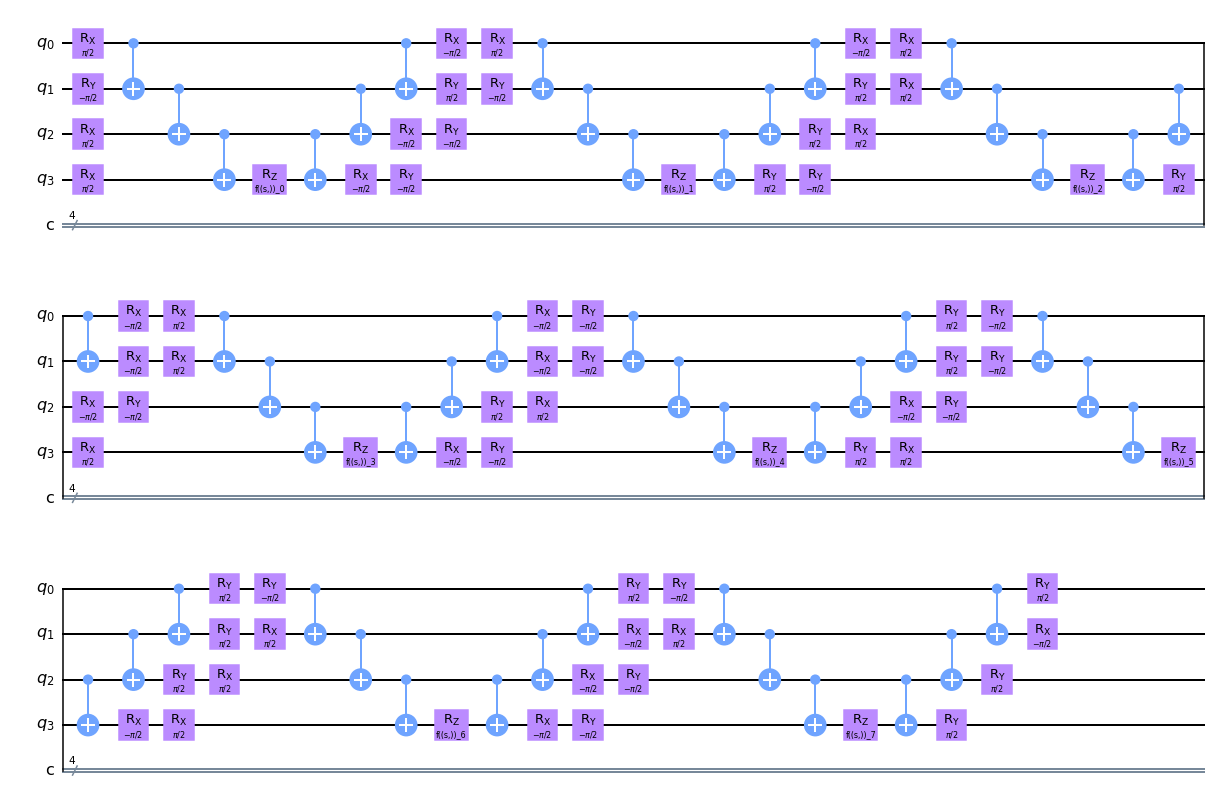

In [5]:
# double excitation unitary
idx = [(0,1), (2,3)]
excitation_gate = mol.make_excitation_gate(idx, angle="s")

qiskit_circuit = tq.compile(excitation_gate, backend='qiskit').circuit
qiskit_circuit.draw(output='mpl')

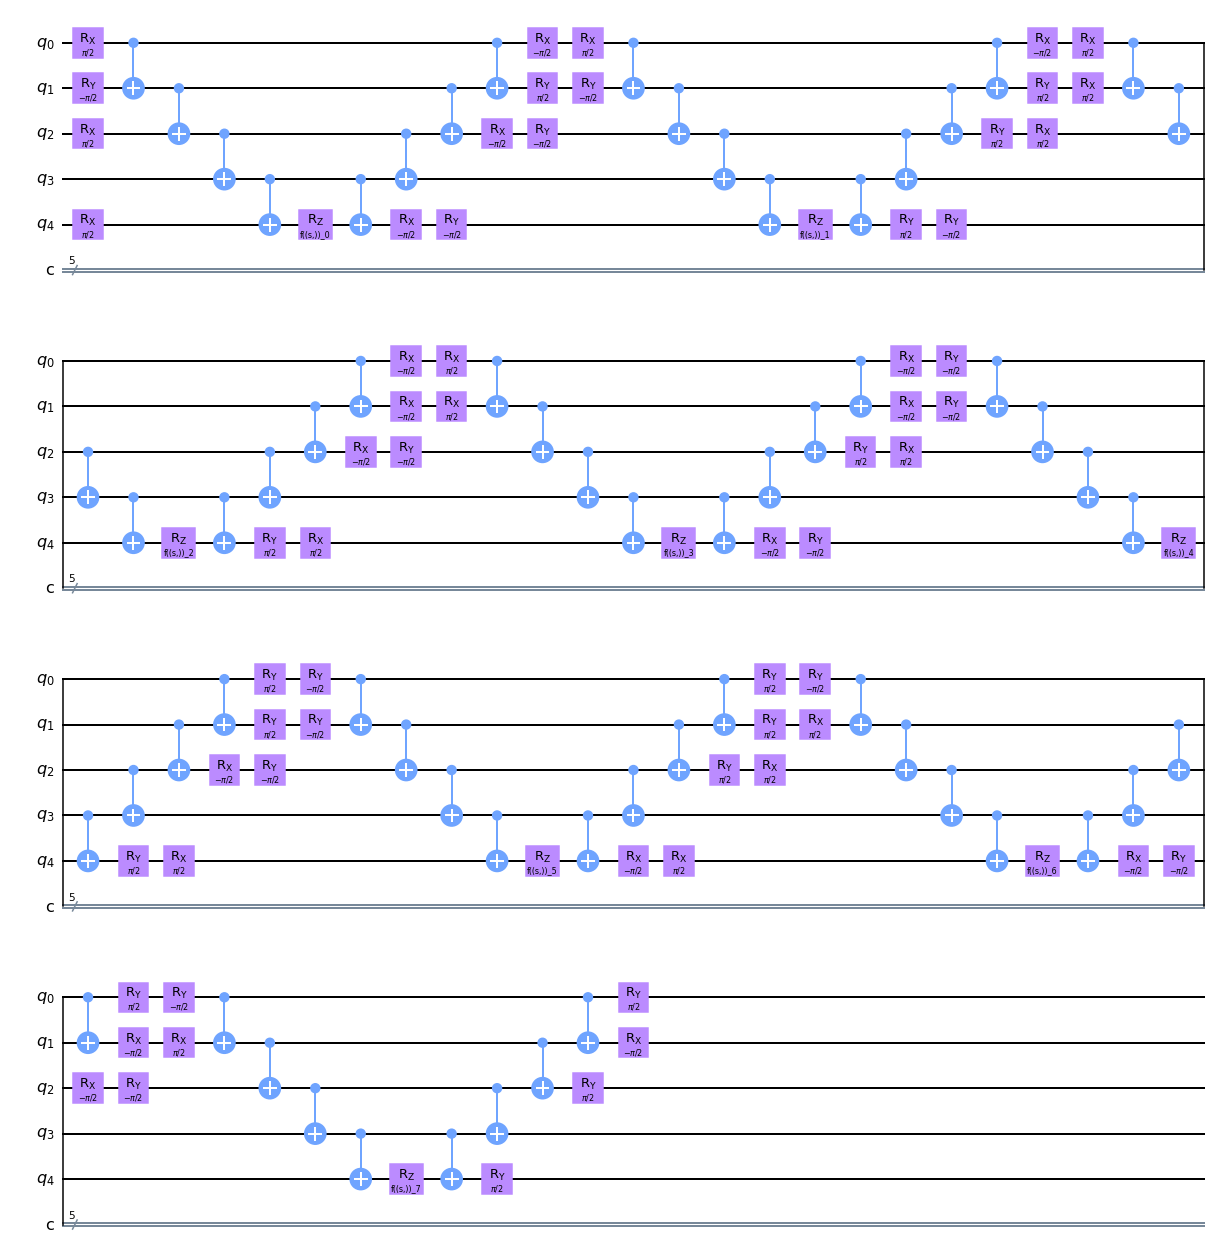

In [6]:
# double excitation unitary
idx = [(0,1), (2,4)]
excitation_gate = mol.make_excitation_gate(idx, angle="s")

qiskit_circuit = tq.compile(excitation_gate, backend='qiskit').circuit
qiskit_circuit.draw(output='mpl')

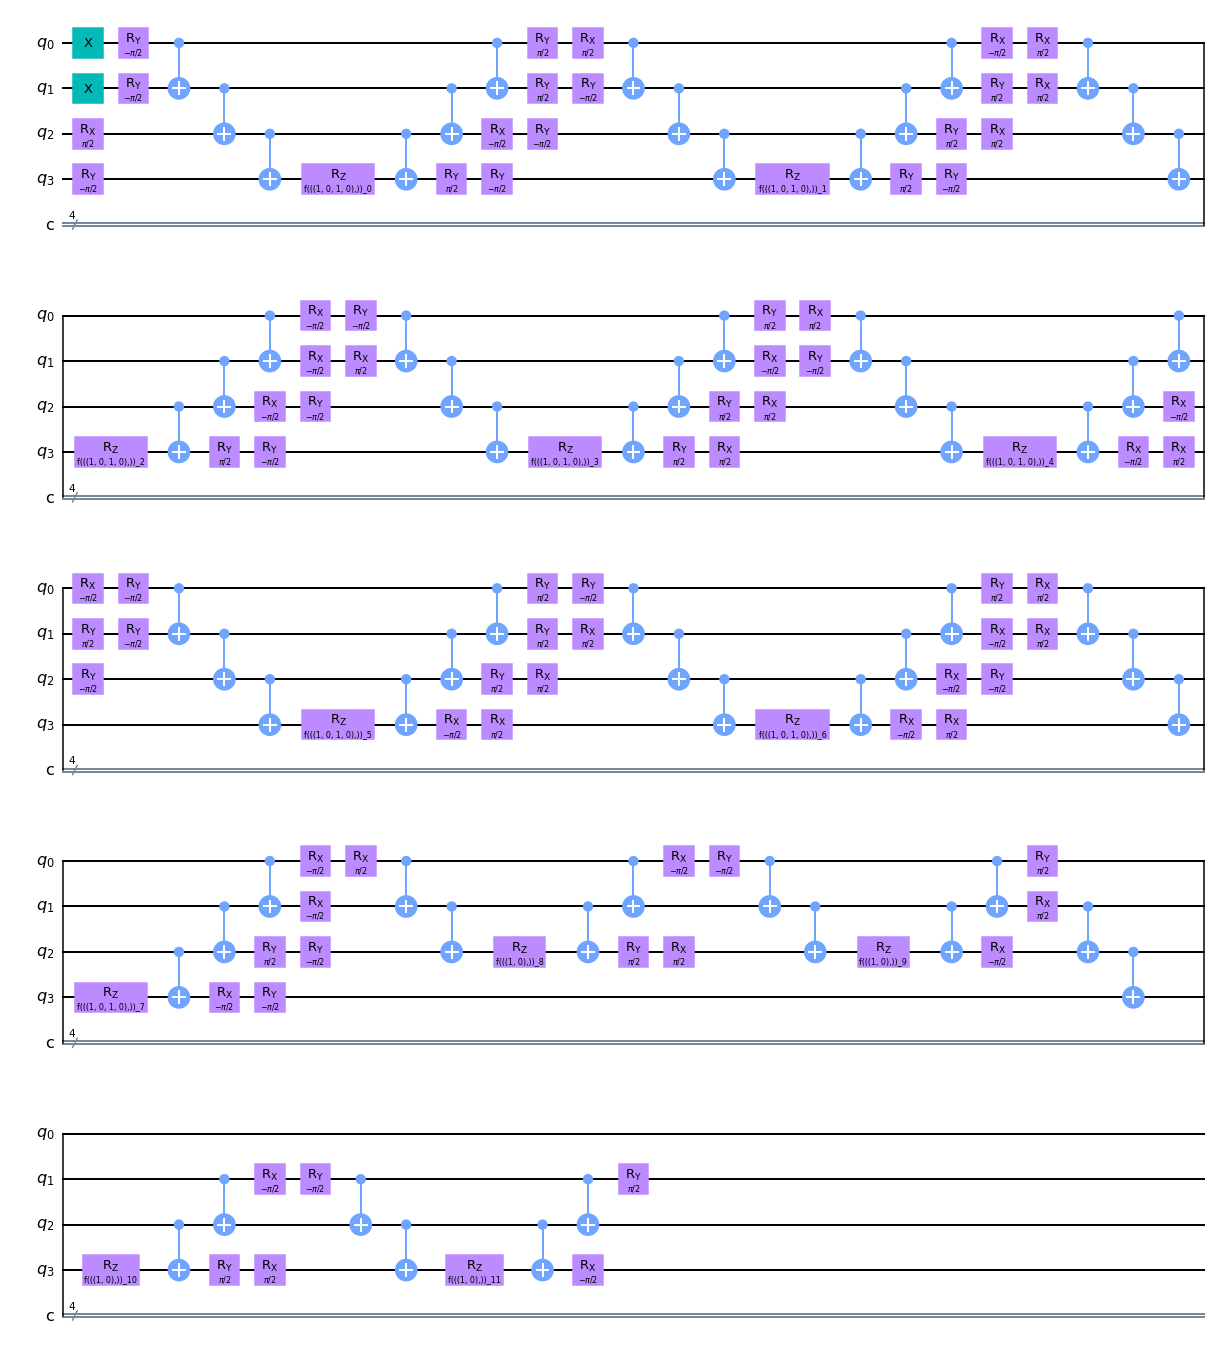

In [7]:
# double excitation unitary
idx = [(0,1), (2,3)]

# create the full UCC circuit
ucc_circuit = mol.make_uccsd_ansatz( trotter_steps=1)

qiskit_circuit = tq.compile(ucc_circuit, backend='qiskit').circuit
qiskit_circuit.draw(output='mpl')

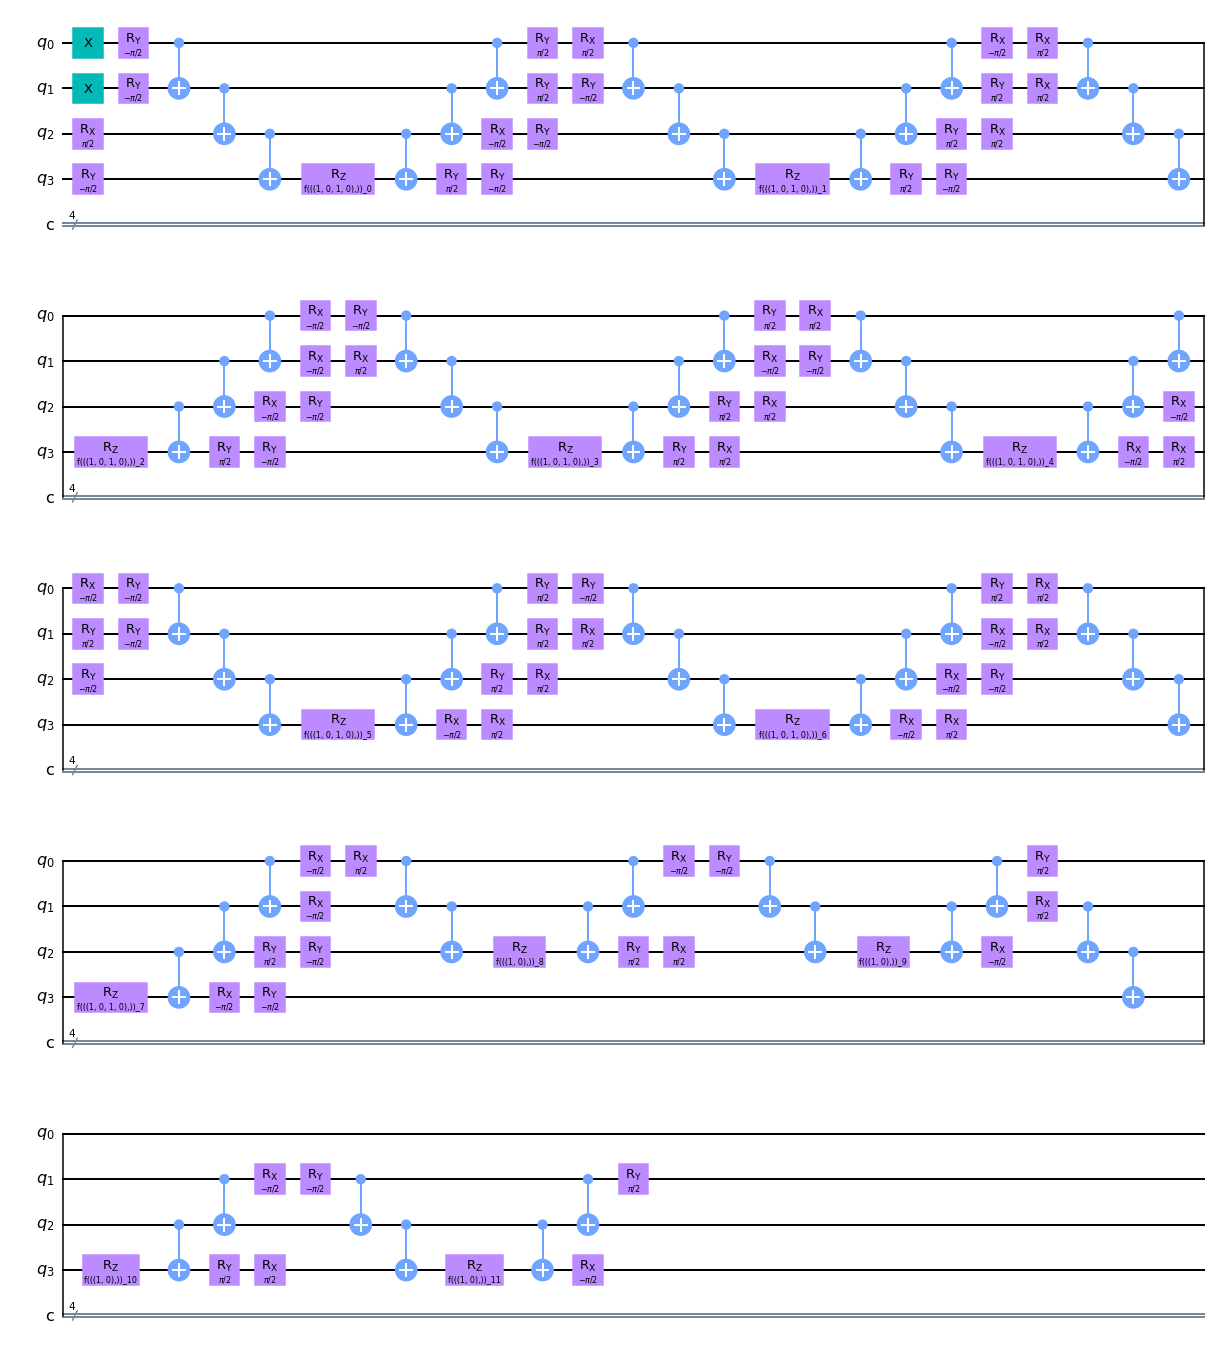

In [8]:
# create the full UCC circuit
ucc_circuit = mol.make_uccsd_ansatz( trotter_steps=1)

qiskit_circuit = tq.compile(ucc_circuit, backend='qiskit').circuit
qiskit_circuit.draw(output='mpl')

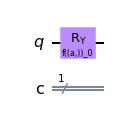

In [39]:
# optimize a one qubit example

# define a variable
a = tq.Variable("a")
# define a simple circuit
U = tq.gates.Ry(angle=a*np.pi, target=0)

# Compile the circuit to Qiskit
qiskit_circuit = tq.compile(U, backend='qiskit').circuit
qiskit_circuit.draw(output='mpl')

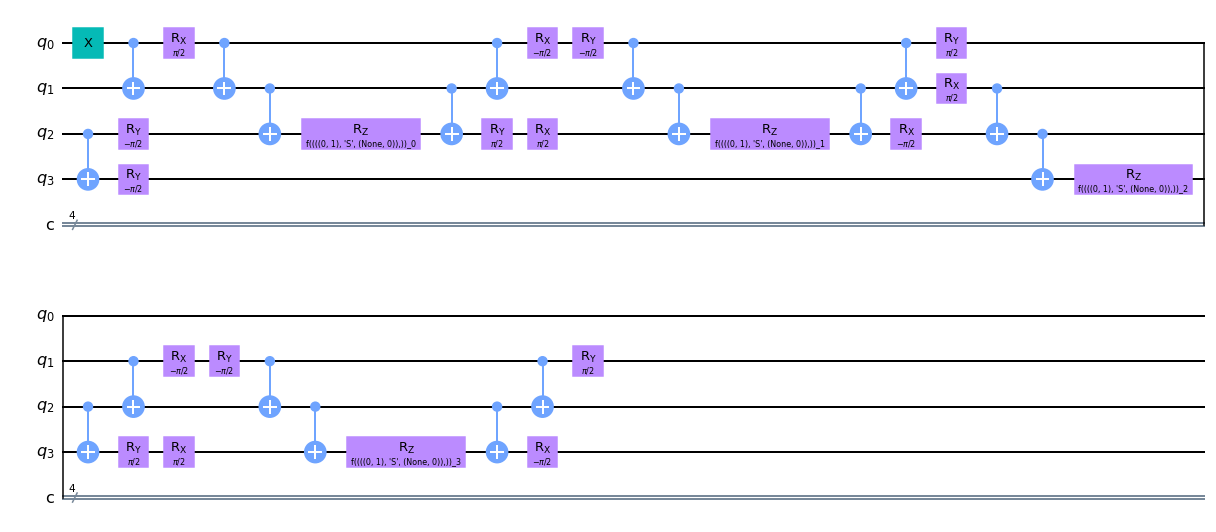

In [11]:
# double excitation unitary
idx = [(0,2), (1,3)]

# create the full UCC circuit
ucc_circuit = mol.make_upccgsd_ansatz(name="UpCCGS")

qiskit_circuit = tq.compile(ucc_circuit, backend='qiskit').circuit
qiskit_circuit.draw(output='mpl')

In [1]:
import tequila as tq
# define the active space
# active_orbitals = {"A1":[1], "B1":[0]}
samples = 1000000
backend = "qiskit"
device = "fake_rome"
# define the molecule
molecule = tq.chemistry.Molecule(geometry = "H 0.0 0.0 0.0\nH 0.0 0.0 7",
                                 basis_set="sto-3g",
                                #  active_orbitals=active_orbitals,
                                 transformation="jordan_wigner")

fci = molecule.compute_energy("fci")

H = molecule.make_hamiltonian()

# Toy circuit (no deeper meaning)
U = tq.gates.Ry(angle="a", target=0)
U += tq.gates.X(target=1, control=0)
E = tq.ExpectationValue(H=H, U=U, optimize_measurements=True)

vqe = tq.minimize(method="cobyla", objective=E, initial_values=0.0)
noisy_vqe = tq.minimize(method="cobyla", objective=E, samples=samples, backend=backend, device=device, initial_values=0.0)

# The same with UpCCGSD
UpCCGSD = molecule.make_upccgsd_ansatz(name="UCCD")
E2 = tq.ExpectationValue(H=H, U=UpCCGSD, optimize_measurements=True)
ucc = tq.minimize(method="cobyla", objective=E2, initial_values=0.0)
noisy_ucc = tq.minimize(method="cobyla", objective=E2, samples=samples,  backend=backend, device=device, initial_values=0.0)

print("VQE         = {:2.8f}".format(min(vqe.history.energies)))
print("VQE (noisy) = {:2.8f}".format(min(noisy_vqe.history.energies)))
print("UCC         = {:2.8f}".format(min(ucc.history.energies)))
print("UCC (noisy) = {:2.8f}".format(min(noisy_ucc.history.energies)))

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qiskit
device          : None
samples         : None
save_history    : True
noise           : None

Method          : COBYLA
Objective       : 2 expectationvalues

active variables : 1

E=+0.07559674  angles= {a: 0.0}  samples= None
E=-0.07593253  angles= {a: 1.0}  samples= None
E=-0.39120504  angles= {a: 2.0}  samples= None
E=-0.58036069  angles= {a: 3.0}  samples= None
E=-0.46949065  angles= {a: 4.0}  samples= None
E=-0.56271378  angles= {a: 3.5}  samples= None
E=-0.55870738  angles= {a: 2.75}  samples= None
E=-0.58361407  angles= {a: 3.125}  samples= None
E=-0.58172442  angles= {a: 3.25}  samples= None
E=-0.58331216  angles= {a: 3.1875}  samples= None
E=-0.58328227  angles= {a: 3.09375}  samples= None
E=-0.58365929  angles= {a: 3.140625}  samples= None
E=-0.58362404  angles= {a: 3.15625}  samples= None
E=-0.58365172  angles= {a: 3.1484375}  samples= None
E=-0.58365553  angles= {a: 3.13671875}  

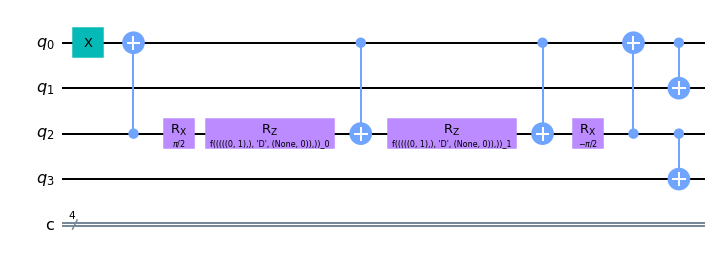

In [13]:
qiskit_circuit = tq.compile(UpCCGSD, backend='qiskit').circuit
qiskit_circuit.draw(output='mpl')

In [1]:
from qiskit_nature.circuit.library import HartreeFock, UCCSD, UCC